In [4]:
# !pip install --upgrade pip
# !pip install pandas_datareader yfinance numpy pandas scikit-learn keras matplotlib
# !pip install tensorflow
# !pip install --upgrade statsmodels
# !pip install --upgrade tensorflow
# !pip install streamlit_jupyter
# !pip install yfinance --upgrade --no-cache-dir



LSTM MODEL for artificial intelligence Stock investing Robot, InvestiBot

In [5]:
# To predict price of APPL
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout, Flatten, Reshape
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
plt.style.use('fivethirtyeight')

#Get the stock price
df = web.DataReader('AAPL', data_source='yahoo', start='2013-01-01', end='2023-12-31')
df

In [6]:
import pandas as pd
import glob

# Define the directory containing CSV files
data_dir = "/Users/charles/Desktop/AI_investment_Robot/TradingRobot/Dataset/usa-stocks-prices/D1"  # Replace with the actual path

# Get all CSV filenames
csv_files = glob.glob(f"{data_dir}/*.US_D1.csv")

# Initialize an empty dictionary to store filtered data
all_closes = {}

# Loop through each CSV file
for filename in csv_files:
  try:
    ticker = filename.split(".")[0]

    # Read the CSV file
    data = pd.read_csv(filename)

    # Extract the "close" column (assuming it exists)
    closes = data["close"]

    # Add the "close" series to the dictionary with ticker as key
    all_closes[ticker] = closes
  except FileNotFoundError:
    print(f"File not found: {filename}")
  except KeyError:
    print(f"Column 'close' not found in: {filename}")

# Print or process the filtered data
if all_closes:
  # Option 1: Access data by ticker symbol
  specific_ticker = "AAPL"  # Replace with desired ticker
  if specific_ticker in all_closes:
    print(f"Close prices for {specific_ticker}:")
    print(all_closes[specific_ticker].head())  # Display first few rows
  else:
    print(f"Ticker '{specific_ticker}' data not found.")

  # Option 2: Process all data (consider looping through dictionary)
  # ...
else:
  print("No 'close' data found in any CSV files.")

Ticker 'AAPL' data not found.


In [7]:
# import streamlit as st

# from streamlit_jupyter import StreamlitPatcher, tqdm

# StreamlitPatcher().jupyter()  

In [8]:
# Download AAPL data
ticker = yf.Ticker("AAPL")
df = ticker.history(start="2014-01-01", end=date.today())  # Use date.today() for current date

# Display the DataFrame
print(df)

                                 Open        High         Low       Close  \
Date                                                                        
2014-01-02 00:00:00-05:00   17.352858   17.395016   17.238563   17.273226   
2014-01-03 00:00:00-05:00   17.264801   17.291032   16.876634   16.893810   
2014-01-06 00:00:00-05:00   16.783571   17.075553   16.663342   16.985929   
2014-01-07 00:00:00-05:00   16.998109   17.049322   16.798249   16.864452   
2014-01-08 00:00:00-05:00   16.826040   17.036831   16.822294   16.971252   
...                               ...         ...         ...         ...   
2024-07-23 00:00:00-04:00  224.369995  226.940002  222.679993  225.009995   
2024-07-24 00:00:00-04:00  224.000000  224.800003  217.130005  218.539993   
2024-07-25 00:00:00-04:00  218.929993  220.850006  214.619995  217.490005   
2024-07-26 00:00:00-04:00  218.699997  219.490005  216.009995  217.960007   
2024-07-29 00:00:00-04:00  216.960007  219.300003  215.750000  218.240005   

In [9]:
df.shape

(2660, 7)

Text(0, 0.5, 'Close Price in USD')

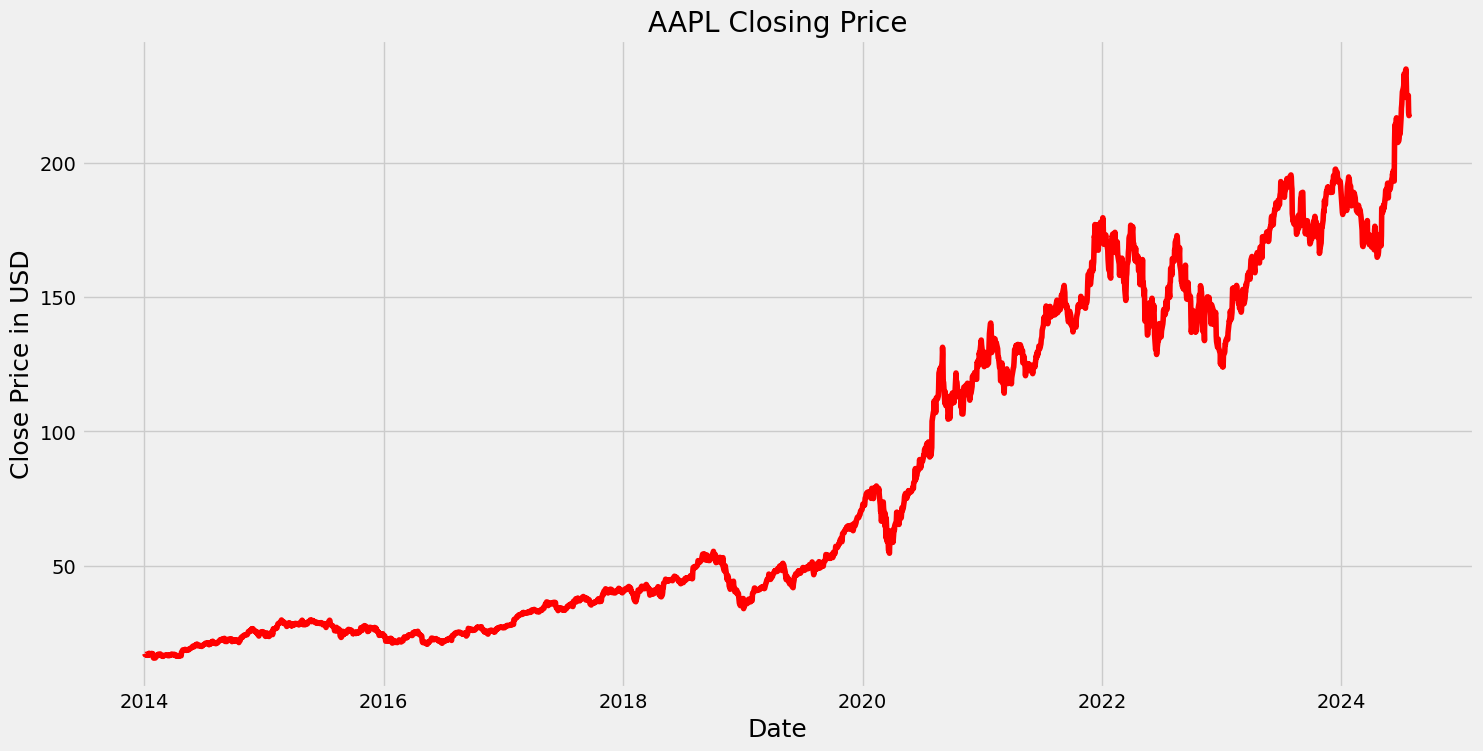

In [10]:
# visualise the price history
plt.figure(figsize=(16,8))
plt.title('AAPL Closing Price')
plt.plot(df['Close'],'r')
#plt.plot(dt['High'],'g^')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price in USD',fontsize=18)

In [11]:
#Create a new data frame with only the Close Column
data = df.filter(['Close'])
#convert to numpy array
dataset = data.values
#Get a number rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len
#dataset
#data.all
#Extract dates of the data from the close values
dates = df.index.to_numpy()

In [12]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0076    ],
       [0.00586919],
       [0.00628942],
       ...,
       [0.92094439],
       [0.92308843],
       [0.92436572]])

In [13]:

# total_data_len = len(scaled_data)

# # Calculate the lengths for training, validation, and testing data
# validation_data_len = math.ceil(total_data_len *.2)

# # # Calculate the starting index for the testing data
# # testing_data_start_index = training_data_len + validation_data_len

# # # Calculate the remaining data length for testing
# # testing_data_len = total_data_len - training_data_len - validation_data_len

# # Split the data
# train_data = scaled_data[0:training_data_len]
# # val_data = scaled_data[training_data_len:training_data_len + validation_data_len]
# test_data = scaled_data[training_data_len:]

# # Print the lengths to verify
# print(f'Training data length: {len(train_data)}')
# # print(f'Validation data length: {len(val_data)}')
# print(f'Testing data length: {len(test_data)}')

In [14]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

In [15]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    
print(dates)
    

[array([0.0076    , 0.00586919, 0.00628942, 0.00573526, 0.00622246,
       0.0052338 , 0.00472381, 0.00512128, 0.00663984, 0.00820262,
       0.00775955, 0.00582504, 0.00702163, 0.00736923, 0.00803449,
       0.00659426, 0.00722534, 0.00095732, 0.00013816, 0.        ,
       0.0001168 , 0.00024928, 0.00128352, 0.00182487, 0.00225047,
       0.003278  , 0.00461221, 0.0056111 , 0.00560532, 0.00682489,
       0.00676181, 0.00704846, 0.00581315, 0.00492173, 0.00407622,
       0.00440584, 0.00361909, 0.00294409, 0.00442304, 0.0042181 ,
       0.00443595, 0.00493466, 0.00509514, 0.00486443, 0.00482   ,
       0.0048888 , 0.0056297 , 0.00570422, 0.00485011, 0.00399597,
       0.00428974, 0.00495758, 0.00493753, 0.00457064, 0.00516826,
       0.00607396, 0.00690516, 0.00615851, 0.00582602, 0.00574004])]
[0.005722838599536373]
[array([0.0076    , 0.00586919, 0.00628942, 0.00573526, 0.00622246,
       0.0052338 , 0.00472381, 0.00512128, 0.00663984, 0.00820262,
       0.00775955, 0.00582504, 0.00

In [16]:
#convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2068, 60, 1)

#### rolling window but not valid due to insufficient RAM

In [17]:
# step_size = 1
# window_size = 30
# pred_horizon = 30
# def create_train_val_sets(data, start_idx, window_size, pred_horizon, step_size):
#   train_set = []
#   val_set = []

#   # Assuming X is a list of features for each data point in data
#   for start_idx in range(0, len(data) - window_size - pred_horizon + 1, step_size):
#     # Use start_idx for indexing (corrected)
#     window = data[start_idx:start_idx + window_size]

#     # Extract features based on feature selection
#     train_sample_x = window  # Extract features as NumPy array

#     # Create validation sample (target at the end of the window + pred_horizon)
#     val_sample_y = data[start_idx + window_size + pred_horizon - 1]

#     train_set.append(train_sample_x)
#     val_set.append(val_sample_y)

#   return train_set, val_set

# # Accumulate training and validation sets
# all_train_x = []
# all_train_y = []
# all_val_x = []
# all_val_y = []

# # Loop through train_data with sliding window for training dataset creation
# for start_idx in range(0, len(train_data) - window_size - pred_horizon + 1, step_size):
#   train_set, train_set_y = create_train_val_sets(train_data, start_idx, window_size, pred_horizon, step_size)
#   all_train_x.extend(train_set)
#   all_train_y.extend([train_set_y] * len(train_set))

# # Loop through val_data for validation set creation
# for start_idx in range(0, len(val_data) - window_size - pred_horizon + 1, step_size):
#   val_set_x, val_set_y = create_train_val_sets(val_data, start_idx, window_size, pred_horizon, step_size)
#   all_val_x.extend(val_set_x)
#   all_val_y.append(val_set_y) 

In [18]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\charles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# #Build LSTM model
# model = Sequential()
# model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(50,return_sequences=False))
# model.add(Dropout(0.2))  # Add dropout layer
# model.add(Dense(25))
# model.add(Dense(1))

In [20]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])

#### callback

In [21]:
# here we will save all our trained models
list_for_models = []
class SaveAllModels(tf.keras.callbacks.Callback):

    def __init__(self, external_list):
        self.list_obj = external_list
    
    def on_epoch_end(self, epoch, logs=None):
        self.list_obj.append({
            "model": self.model,
            "loss": logs['loss'],
            "accuracy": logs['accuracy'],
            "val_loss": logs['val_loss'],
            "val_accuracy": logs['val_accuracy'],
        })


save_all_models_callback = SaveAllModels(list_for_models)

callbacks = [
                save_all_models_callback, # ModelCheckpoint(" 'model_{epoch:1d}.hdf5'"),
            ]


### Rolling window prediction Model 

In [22]:

# # Now you have separate training and validation sets in all_train_x, all_train_y, all_val_x, all_val_y
# batch_size = 32

# model.fit(all_train_x, all_train_y, epochs=10, batch_size=batch_size)

# validation_loss, validation_accuracy = model.evaluate(all_val_x, all_val_y)
# print("Validation Loss:", validation_loss)
# print("Validation Accuracy:", validation_accuracy)

In [23]:

# Adding early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Train the model with validation
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    callbacks=[callbacks, early_stopping]
)

# Save the entire model using model.save()
model.save('AI_investment.keras')


Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.0000e+00 - loss: 0.0027 - val_accuracy: 0.0000e+00 - val_loss: 0.0020
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.0000e+00 - loss: 1.1212e-04 - val_accuracy: 0.0000e+00 - val_loss: 6.8404e-04
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0000e+00 - loss: 1.1217e-04 - val_accuracy: 0.0000e+00 - val_loss: 9.8003e-04
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0000e+00 - loss: 9.9500e-05 - val_accuracy: 0.0000e+00 - val_loss: 6.0976e-04
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.0000e+00 - loss: 1.1820e-04 - val_accuracy: 0.0000e+00 - val_loss: 7.7476e-04
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0000e+00 - loss: 1.4344e-04 - val_accuracy: 0.0000e+00 - val_loss: 5.6806e-04
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0000e+00 - loss: 1.0179e-04 - val_accuracy: 0.0000e+00 - val_loss: 5.8215e-04


## Old training model


In [24]:
# import pickle
# # import statsmodels.api as sm
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# # Train the model with validation
# history = model.fit(
#     x_train, y_train,
#     batch_size=32,
#     epochs=100,
#     validation_split=0.2,
#     callbacks=[callbacks, early_stopping]
# )

# # Save the model to a file
# with open('LSTM.pkl', 'wb') as f:
#   pickle.dump(model, f)

# print("Model saved successfully!")

In [25]:
# #Create the testing data
test_data = scaled_data[training_data_len-60:,:]
#Create the data sets x_test, y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
 x_test.append(test_data[i-60:i,0])

In [26]:
x_test = np.array(x_test)

In [27]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

## using saved model to test testing data


In [28]:
# Load the saved model
loaded_model = load_model('AI_investment.keras')

predictions = loaded_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [29]:
#Get the rmse
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse


1.7125523932894369

In [30]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [31]:
#Get the mse
mse = np.mean((predictions - y_test) ** 2)
mse


13.399919556221104

C:\Users\charles\AppData\Local\Temp\ipykernel_14716\201641445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


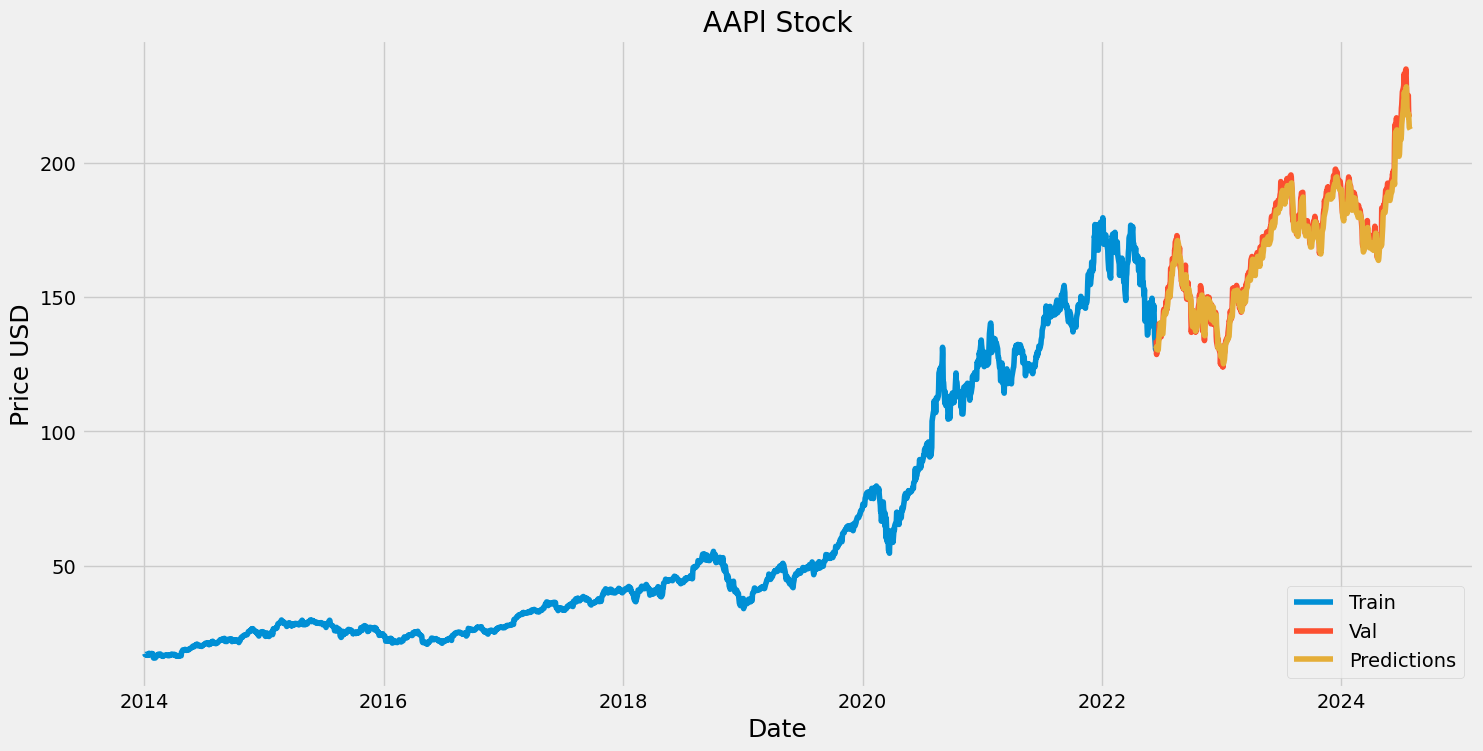

In [32]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

# Assign predictions directly to new column (avoids copy warning)
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('AAPl Stock')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD', fontsize=18)
plt.plot(train['Close'], label='Train')  # Add label for clarity
plt.plot(valid['Close'], label='Val')  # Add label for clarity
plt.plot(valid['Predictions'], label='Predictions')  # Plot predictions separately
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [33]:
valid

,Close,Predictions
Date,,
2022-06-15 00:00:00-04:00,133.914917,130.816986
2022-06-16 00:00:00-04:00,128.604996,131.464661
2022-06-17 00:00:00-04:00,130.088196,130.478607
2022-06-21 00:00:00-04:00,134.349976,130.272781
2022-06-22 00:00:00-04:00,133.835815,132.368652
...,...,...
2024-07-23 00:00:00-04:00,225.009995,216.958221
2024-07-24 00:00:00-04:00,218.539993,218.084061
2024-07-25 00:00:00-04:00,217.490005,215.543869


In [34]:
#get datatable
ticker = yf.Ticker("AAPL")

dt = ticker.history(start="2012-01-01", end=date.today())
dt
# print(dt)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03 00:00:00-05:00,12.361729,12.455332,12.349651,12.416985,302220800,0.0,0.0
2012-01-04 00:00:00-05:00,12.379842,12.521155,12.358102,12.483712,260022000,0.0,0.0
2012-01-05 00:00:00-05:00,12.529307,12.638008,12.460463,12.622307,271269600,0.0,0.0
2012-01-06 00:00:00-05:00,12.674846,12.764826,12.658239,12.754258,318292800,0.0,0.0
2012-01-09 00:00:00-05:00,12.847859,12.915796,12.722550,12.734024,394024400,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-23 00:00:00-04:00,224.369995,226.940002,222.679993,225.009995,39960300,0.0,0.0
2024-07-24 00:00:00-04:00,224.000000,224.800003,217.130005,218.539993,61777600,0.0,0.0
2024-07-25 00:00:00-04:00,218.929993,220.850006,214.619995,217.490005,51391200,0.0,0.0


In [35]:
apple_quote = dt
apple_quote
new_df = apple_quote.filter(['Close'])
last60days = new_df[-60:].values
last60days
scaler = MinMaxScaler(feature_range=(0,1))
scalar = scaler.fit(last60days)
last60days_scaled = scaler.transform(last60days)
last60days_scaled



array([[0.        ],
       [0.16664387],
       [0.13975566],
       [0.15086486],
       [0.15633938],
       [0.18580408],
       [0.16532819],
       [0.21740442],
       [0.23594541],
       [0.27286652],
       [0.27480116],
       [0.27528482],
       [0.29414834],
       [0.31526927],
       [0.29189117],
       [0.22707813],
       [0.27705833],
       [0.27721971],
       [0.28205632],
       [0.29817901],
       [0.31365691],
       [0.34235528],
       [0.34751466],
       [0.37202097],
       [0.34961044],
       [0.38846618],
       [0.32768357],
       [0.55388491],
       [0.64933146],
       [0.66819498],
       [0.63998027],
       [0.707373  ],
       [0.66900092],
       [0.5946753 ],
       [0.55936681],
       [0.56984646],
       [0.58484069],
       [0.65223343],
       [0.66593781],
       [0.60983067],
       [0.70866285],
       [0.76541479],
       [0.78605182],
       [0.8632794 ],
       [0.88714116],
       [0.90100644],
       [0.97033406],
       [0.883

### create an array for the dates of the prices

In [36]:
import pandas as pd
import numpy as np

datesAAPL = dt.index.to_numpy()
datesAAPL
# Convert to Pandas DatetimeIndex for easier manipulation
datesAAPL_index = pd.DatetimeIndex(datesAAPL)

# Extract the date part only
dates_only = datesAAPL_index.date
dates_only

dates_only_np = np.array(dates_only)
# Convert back to NumPy array if needed
# dates_only_np = dates_only.to_numpy()
dates_only_np

array([datetime.date(2012, 1, 3), datetime.date(2012, 1, 4),
       datetime.date(2012, 1, 5), ..., datetime.date(2024, 7, 25),
       datetime.date(2024, 7, 26), datetime.date(2024, 7, 29)],
      dtype=object)

In [37]:
last_60_days = dates_only_np[-60:]

print(last_60_days)

[datetime.date(2024, 5, 2) datetime.date(2024, 5, 3)
 datetime.date(2024, 5, 6) datetime.date(2024, 5, 7)
 datetime.date(2024, 5, 8) datetime.date(2024, 5, 9)
 datetime.date(2024, 5, 10) datetime.date(2024, 5, 13)
 datetime.date(2024, 5, 14) datetime.date(2024, 5, 15)
 datetime.date(2024, 5, 16) datetime.date(2024, 5, 17)
 datetime.date(2024, 5, 20) datetime.date(2024, 5, 21)
 datetime.date(2024, 5, 22) datetime.date(2024, 5, 23)
 datetime.date(2024, 5, 24) datetime.date(2024, 5, 28)
 datetime.date(2024, 5, 29) datetime.date(2024, 5, 30)
 datetime.date(2024, 5, 31) datetime.date(2024, 6, 3)
 datetime.date(2024, 6, 4) datetime.date(2024, 6, 5)
 datetime.date(2024, 6, 6) datetime.date(2024, 6, 7)
 datetime.date(2024, 6, 10) datetime.date(2024, 6, 11)
 datetime.date(2024, 6, 12) datetime.date(2024, 6, 13)
 datetime.date(2024, 6, 14) datetime.date(2024, 6, 17)
 datetime.date(2024, 6, 18) datetime.date(2024, 6, 20)
 datetime.date(2024, 6, 21) datetime.date(2024, 6, 24)
 datetime.date(2024, 

In [38]:
X_test = []
dates_for_prediction = []  

X_test.append(last60days_scaled)
dates_for_prediction.append(dates_only_np[-1])  # Add the last date from your date list

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)

# Print the predicted price along with the corresponding date
print(f"Predicted Price of AAPL after {dates_for_prediction[0]} is {pred_price[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of AAPL after 2024-07-29 is 216.99215698242188


In [39]:
# Initialize lists for storing the predicted prices and the dates for prediction
future_prices = []
# last 60 days dates 
last_60_days = dates_only_np[-60:]
# Number of days to predict into the future
days_to_predict = 60

# Predict the prices for the next 60 days
for i in range(days_to_predict):
    # Make a prediction
    X_test = np.array([last60days_scaled])
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    pred_price_scaled = model.predict(X_test)
    pred_price_unscaled = scaler.inverse_transform(pred_price_scaled)
    
    # Store the predicted price
    future_prices.append(pred_price_unscaled[0][0])
    
    # Prepare the new input for the next prediction
    new_input = np.append(last60days_scaled[1:], pred_price_scaled, axis=0)
    new_input = np.reshape(new_input, (new_input.shape[0], 1))
    last60days_scaled = new_input
    print(f"Predicted Price of AAPL for day {i+1}: {pred_price_unscaled}")

# Unscale last60days_scaled
last60days_unscaled = scaler.inverse_transform(last60days_scaled)
last60days_unscaled = last60days_unscaled.flatten()

x_historical = np.arange(-60, 0)

# Create x-axis values for predicted data starting from the end of historical data
x_predicted = np.arange(len(last_60_days), len(last60days_unscaled) + days_to_predict)

# Combine x-axis values and data
x_values = np.concatenate([x_historical, x_predicted])
y_values = np.concatenate([last60days_unscaled, future_prices])

# Plot the combined data

# plt.figure(figsize=(16,8))
# plt.plot(x_historical, last60days_unscaled, label='Last 60 Days Historical Price', color='blue')
# plt.plot(x_predicted - len(last60days_unscaled), future_prices, label='30 Days Predicted Price', color='red')
# plt.xlim(-60, 30)
# plt.xlabel('Days')
# plt.ylabel('Price')
# # plt.plot(x_values, y_values, label='Price')
# plt.legend()
# plt.show()
# Create x-axis values for historical prices
# x_values = np.arange(-60, 0)

# last60days = apple_quote.filter(['Close'])
# # Optionally, visualize the predicted prices
# plt.figure(figsize=(12, 6))
# plt.plot(x_values, last60days_unscaled, label='last 60 days Historical Price')
# plt.plot(range(1, days_to_predict + 1), future_prices, label='30 days Predicted Price')
# plt.xlabel('Days')
# plt.ylabel('Price')
# plt.title('last 60 days with Next 30 Days Predicted Prices for AAPL')
# plt.legend()
# plt.grid(True)
# plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of AAPL for day 1: [[216.99216]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of AAPL for day 2: [[216.89658]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of AAPL for day 3: [[216.77327]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of AAPL for day 4: [[216.67583]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of AAPL for day 5: [[216.60208]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of AAPL for day 6: [[216.53949]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Price of AAPL for day 7: [[216.47653]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of AAPL for day 8: [[216.40509]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of AAPL for day 9: [[216.32053]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of AAPL for day 10: [[216.22096]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of AAPL for day 11: [[216.10666]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Pre

In [40]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming you have a DataFrame 'apple_quote' with a 'Close' column containing historical prices
# past_prices = apple_quote['Close'].values

# # Generate a range of dates for plotting
# dates = pd.date_range(start=apple_quote.index[0], periods=len(past_prices))
# # predict_dates = pd.date_range(start=apple_quote.index[-1], periods=days_to_predict)

# # Create a DataFrame for plotting
# df_plot = pd.DataFrame({'Date': dates, 'Price': past_prices})
# predict_plot = pd.DataFrame({'Date': days_to_predict, 'Price':future_prices})

# # Plotting
# plt.figure(figsize=(16,8))
# plt.plot(df_plot['Date'], df_plot['Price'], label='Historical and predicted Prices')
# # plt.plot(predict_plot['predict_dates'], predict_plot['future_prices'], label='Predicted Prices')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.title('AAPL Stock Price Prediction')
# plt.legend()
# plt.show()


In [41]:
X_test = []
X_test.append(last60days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[210.66133]]


In [42]:
x_test.shape

(532, 60, 1)

### Load model that i saved above to test on unseen data

In [43]:
loaded_model = keras.models.load_model('AI_investment.keras')

# Use the loaded model
print(loaded_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

None


In [44]:
# import pickle

# # Load the model
# with open('LSTM.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

# # Use the loaded model
# print(loaded_model.summary())

In [45]:
#get quote
# from pandas_datareader import data as pdr
# import yfinance as yf
# yf.pdr_override()
# dt = pdr.get_data_yahoo("msft", start="2012-01-01", end="2022-11-13")
# dt.head

# Download MSFT data
ticker = yf.Ticker("nvda")
dt = ticker.history(start="2012-01-01", end=date.today())  
dt.head

<bound method NDFrame.head of                                  Open        High         Low       Close  \
Date                                                                        
2012-01-03 00:00:00-05:00    0.327909    0.330202    0.321259    0.321947   
2012-01-04 00:00:00-05:00    0.322176    0.326991    0.319195    0.325616   
2012-01-05 00:00:00-05:00    0.324010    0.338915    0.322635    0.337310   
2012-01-06 00:00:00-05:00    0.337081    0.337310    0.329514    0.333412   
2012-01-09 00:00:00-05:00    0.333641    0.339833    0.331119    0.333412   
...                               ...         ...         ...         ...   
2024-07-23 00:00:00-04:00  122.779999  124.690002  122.099998  122.589996   
2024-07-24 00:00:00-04:00  119.169998  119.949997  113.440002  114.250000   
2024-07-25 00:00:00-04:00  113.040001  116.629997  106.300003  112.279999   
2024-07-26 00:00:00-04:00  116.190002  116.199997  111.580002  113.059998   
2024-07-29 00:00:00-04:00  113.690002  116.279

In [46]:
new_quote = dt
new_quote
new_df = new_quote.filter(['Close'])
last60days = new_df[-60:].values
last60days
scaler = MinMaxScaler(feature_range=(0,1))
scalar = scaler.fit(last60days)
last60days_scaled = scaler.transform(last60days)
last60days_scaled

datesNVDA = dt.index.to_numpy()
# datesNVDA


In [47]:
X_test = []
dates_for_prediction = []  # Create list to store dates

actual_shape = last60days_scaled.shape  # Get the actual shape
# Assuming it has a different shape (e.g., 60 elements)
X_test.append(last60days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
dates_for_prediction.append(datesNVDA[-1])  # Add the last date from your date list

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price = loaded_model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)

# Print the predicted price along with the corresponding date
print(f"Predicted Price for {dates_for_prediction[0]}: {pred_price[0][0]}")

print(X_test)
print(X_test.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Predicted Price for 2024-07-29 00:00:00-04:00: 111.79657745361328
[[[0.        ]
  [0.05970972]
  [0.12703381]
  [0.09516989]
  [0.09231711]
  [0.058866  ]
  [0.08158845]
  [0.0920559 ]
  [0.11128266]
  [0.17705972]
  [0.17161522]
  [0.13384446]
  [0.18007346]
  [0.19224844]
  [0.18348882]
  [0.36127209]
  [0.41491432]
  [0.5642288 ]
  [0.58279257]
  [0.49590003]
  [0.47848151]
  [0.58630849]
  [0.61517875]
  [0.73578377]
  [0.7068128 ]
  [0.70460293]
  [0.72272475]
  [0.70524446]
  [0.79144074]
  [0.88004832]
  [0.92565816]
  [0.90757481]
  [1.        ]
  [0.90355639]
  [0.81896739]
  [0.64898566]
  [0.80932297]
  [0.81555172]
  [0.76712895]
  [0.75808743]
  [0.7733577 ]
  [0.74060698]
  [0.85332538]
  [0.80409905]
  [0.85171795]
  [0.91561196]
  [0.98653813]
  [0.83564412]
  [0.87261423]
  [0.85654024]
  [0.814748  ]
  [0.64657452]
  [0.70886094]
  [0.64536902]
  [0.75808743]
  [0.73899955]
  [0.57142897]
  [0.5318469 ]
  [0.54751895]
  [0.51798

same plot as above


In [48]:
# #plot the data
# train = data[:last60days]
# valid = data[last60days:]
# valid['Predictions'] = predictions
# #visualise the data
# plt.figure(figsize=(16,8))
# plt.title('Model')
# plt.xlabel('Date',fontsize=18)
# plt.ylabel('Price USD',fontsize=18)
# plt.plot(train['Close'])
# plt.plot(valid[['Close','Predictions']])
# #plt.plot(valid['Predictions'])
# plt.legend(['Train','Val','Predictions'], loc='lower right')
# plt.show

In [49]:
X_test = []
X_test.append(last60days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# new_pred_price = model.predict(X_test)
# pred_price = scaler.inverse_transform(new_pred_price )
# print(pred_price)
print(X_test)
print(X_test.shape)

[[[0.        ]
  [0.05970972]
  [0.12703381]
  [0.09516989]
  [0.09231711]
  [0.058866  ]
  [0.08158845]
  [0.0920559 ]
  [0.11128266]
  [0.17705972]
  [0.17161522]
  [0.13384446]
  [0.18007346]
  [0.19224844]
  [0.18348882]
  [0.36127209]
  [0.41491432]
  [0.5642288 ]
  [0.58279257]
  [0.49590003]
  [0.47848151]
  [0.58630849]
  [0.61517875]
  [0.73578377]
  [0.7068128 ]
  [0.70460293]
  [0.72272475]
  [0.70524446]
  [0.79144074]
  [0.88004832]
  [0.92565816]
  [0.90757481]
  [1.        ]
  [0.90355639]
  [0.81896739]
  [0.64898566]
  [0.80932297]
  [0.81555172]
  [0.76712895]
  [0.75808743]
  [0.7733577 ]
  [0.74060698]
  [0.85332538]
  [0.80409905]
  [0.85171795]
  [0.91561196]
  [0.98653813]
  [0.83564412]
  [0.87261423]
  [0.85654024]
  [0.814748  ]
  [0.64657452]
  [0.70886094]
  [0.64536902]
  [0.75808743]
  [0.73899955]
  [0.57142897]
  [0.5318469 ]
  [0.54751895]
  [0.51798309]]]
(1, 60, 1)


dont need to rebuild just test data


In [50]:
# #Build LSTM model
# model = Sequential()
# model.add(LSTM(50,return_sequences=True, input_shape=(X_test.shape[1], 1)))

# model.add(LSTM(50,return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

# #Compile the model
# model.compile(optimizer='adam',loss='mean_squared_error')
# #Train the model
# model.fit(X_test,batch_size=1,epochs=1)

In [51]:
pred_price = loaded_model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(f'Price of {ticker} tomorrow :{pred_price}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Price of yfinance.Ticker object <NVDA> tomorrow :[[111.79658]]


In [52]:
# import pickle

# # Load the model
# with open('AI_investment.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

# # Use the loaded model
# print(loaded_model.summary())

use the saved model to predict new data

In [53]:
# import glob

# # Assuming models are saved with extensions like '.h5' or '.pb'
# model_extension = '.h5'  # Adjust based on your extension (e.g., '.pb' for TensorFlow SavedModel)
# model_dir = './'  # Replace with your model directory path

# list_for_models = glob.glob(f"{model_dir}/*.{model_extension}")

# if list_for_models:
#   print("List of saved models:")
#   for model_path in list_for_models:
#     print(model_path)  # Prints the complete path to each saved model
# else:
#   print("No models found in the specified directory.")

not proper extension saved

In [54]:
# import os

# # Assuming models are saved in a directory called 'models'
# model_dir = './'  # Replace with your model directory path

# list_for_models = os.listdir(model_dir)

# if list_for_models:
#   print("List of saved models (filenames):")
#   for model_name in list_for_models:
#     print(model_name)  # Prints only the filename of each saved model
# else:
#   print("No models found in the specified directory.")

60 days later based on my predictions, will be 112, and tomorrow will be 119

In [55]:
# Initialize lists for storing the predicted prices and the dates for prediction
future_prices = []
# last 60 days dates 
last_60_days = dates_only_np[-60:]
# Number of days to predict into the future
days_to_predict = 60

# Predict the prices for the next 60 days
for i in range(days_to_predict):
    # Make a prediction
    X_test = np.array([last60days_scaled])
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    pred_price_scaled = loaded_model.predict(X_test)
    pred_price_unscaled = scaler.inverse_transform(pred_price_scaled)
    
    # Store the predicted price
    future_prices.append(pred_price_unscaled[0][0])
    
    # Prepare the new input for the next prediction
    new_input = np.append(last60days_scaled[1:], pred_price_scaled, axis=0)
    new_input = np.reshape(new_input, (new_input.shape[0], 1))
    last60days_scaled = new_input
    print(f"Predicted Price of NVDA for day {i+1}: {pred_price_unscaled}")

# Unscale last60days_scaled
last60days_unscaled = scaler.inverse_transform(last60days_scaled)
last60days_unscaled = last60days_unscaled.flatten()

x_historical = np.arange(-60, 0)

# Create x-axis values for predicted data starting from the end of historical data
x_predicted = np.arange(len(last_60_days), len(last60days_unscaled) + days_to_predict)

# Combine x-axis values and data
x_values = np.concatenate([x_historical, x_predicted])
y_values = np.concatenate([last60days_unscaled, future_prices])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Price of NVDA for day 1: [[111.79658]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of NVDA for day 2: [[111.63743]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of NVDA for day 3: [[111.781555]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of NVDA for day 4: [[112.055664]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of NVDA for day 5: [[112.384766]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of NVDA for day 6: [[112.72685]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of NVDA for day 7: [[113.05488]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of NVDA for day 8: [[113.35125]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of NVDA for day 9: [[113.6057]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Price of NVDA for day 10: [[113.81377]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Price of NVDA for day 11: [[113.97551]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
P

### Compare predicted price to current price to see percentage change


In [56]:

latest_price = new_df.iloc[-1]
# Get the last predicted price
last_predicted_price = future_prices[-1]

# Calculate the difference
price_difference = (latest_price - last_predicted_price) / latest_price * 100

print("Last Predicted Price:", last_predicted_price)
print("Latest Price from Yahoo Finance:", latest_price)
print("Price Difference:", price_difference)

Last Predicted Price: 113.5763
Latest Price from Yahoo Finance: Close    111.589996
Name: 2024-07-29 00:00:00-04:00, dtype: float64
Price Difference: Close   -1.780003
Name: 2024-07-29 00:00:00-04:00, dtype: float64


In [60]:
import gradio as gr
import pandas as pd

def calculate_price_difference():
    latest_price = new_df.iloc[-1]['Close']
    last_predicted_price = future_prices[-1]

    price_difference = (latest_price - last_predicted_price) / latest_price * 100

    return last_predicted_price, latest_price, price_difference

def display_results():
    last_predicted_price, latest_price, price_difference = calculate_price_difference()

    return f"Predicted Price tomorrow: ${last_predicted_price:.2f}\n" \
           f"Latest Price from Yahoo Finance: ${latest_price:.2f}\n" \
           f"Price Difference: {price_difference:.2f}%"

iface = gr.Interface(
    fn=display_results,
    inputs=[],
    outputs="text",
    title="Stock Price Prediction",
    description="Display the predicted price for tomorrow , and today's close price, and the price difference."
)

iface.launch()


Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


In [63]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to create the plot
def plot_prices():
    plt.figure(figsize=(12, 6))
    plt.plot(x_values, y_values, label='Predicted Prices', color='blue', linestyle='-', marker='o')
    plt.axvline(x=60, color='red', linestyle='--', label='Forecast Boundary')
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.title("Predicted and Historical Prices")
    plt.grid(True)
    plt.legend()
    return plt

# Creating a Gradio interface
iface = gr.Interface(
    fn=plot_prices,
    inputs=[],
    outputs=gr.Plot(label="Stock Price Plot"),
    title="NVDA Stock Price Visualization",
    description="A plot showing historical and predicted stock prices the next 60 days."
)

# Launching the Gradio app
iface.launch()


Running on local URL:  http://127.0.0.1:7873

To create a public link, set `share=True` in `launch()`.
